In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)
import gc
import warnings
warnings.filterwarnings('ignore')


In [2]:
trad = pd.read_parquet('bureau_features', columns = ['customer_number',
                                                     'no_of_trades',
                                                     'total_bl',
                                                     'live_bl',
                                                     'total_cc',
                                                     'total_cl',
                                                     'total_hl',
                                                     'total_al',
                                                     'new_pl_3m',
                                                     'new_bl_3m',
                                                     'new_cc_3m',
                                                     'sum_pl_limit',
                                                     'sum_pl_limit_last_6m',
                                                     'sum_bl_limit',
                                                     'sum_bl_limit_last_6m',
                                                     'sum_cc_limit',
                                                     'TotalOverDueAmount',
                                                     '1_months_dpd_instances',
                                                     'Age',
                                                     'Income',
                                                     'derog',
                                                     'pl_vintage',
                                                     'bl_vintage',
                                                     'cl_vintage',
                                                     'max_pl_remaining_balance_per',
                                                     'max_bl_remaining_balance_per',
                                                     'max_credit_utilization',
                                                     'RBL_ultrahni',
                                                     'dbr',
                                                     '2_months_max_dpd'])

In [3]:
revisits = pd.read_parquet('revisits_3features.parquet.gzip')

In [4]:
revisits.rename(columns={'60_110_days_REVISIT': '60_90_days_REVISIT'}, inplace=True)


In [5]:
revisits.mobilePhone = pd.to_numeric(revisits.mobilePhone, errors = 'coerce')

In [6]:
revisits.dropna(subset = ['mobilePhone'], inplace = True)

In [7]:
# Fill NaN values with a default value (e.g., 0)
revisits['mobilePhone'] = revisits['mobilePhone'].fillna(0).astype(int)


In [8]:
trad.dtypes

customer_number                   int64
no_of_trades                      int64
total_bl                          int64
live_bl                           int64
total_cc                          int64
total_cl                          int64
total_hl                          int64
total_al                          int64
new_pl_3m                         int64
new_bl_3m                         int64
new_cc_3m                         int64
sum_pl_limit                    float64
sum_pl_limit_last_6m            float64
sum_bl_limit                    float64
sum_bl_limit_last_6m            float64
sum_cc_limit                    float64
TotalOverDueAmount              float64
1_months_dpd_instances            int64
Age                             float64
Income                          float64
derog                             int64
pl_vintage                      float64
bl_vintage                      float64
cl_vintage                      float64
max_pl_remaining_balance_per    float64


In [9]:
final = pd.merge(trad,revisits, left_on = 'customer_number', right_on = 'mobilePhone', how = 'left')

In [10]:
final.isna().sum()

customer_number                     0
no_of_trades                        0
total_bl                            0
live_bl                             0
total_cc                            0
total_cl                            0
total_hl                            0
total_al                            0
new_pl_3m                           0
new_bl_3m                           0
new_cc_3m                           0
sum_pl_limit                        0
sum_pl_limit_last_6m                0
sum_bl_limit                        0
sum_bl_limit_last_6m                0
sum_cc_limit                        0
TotalOverDueAmount                  0
1_months_dpd_instances              0
Age                                69
Income                          14363
derog                               0
pl_vintage                          0
bl_vintage                          0
cl_vintage                          0
max_pl_remaining_balance_per        0
max_bl_remaining_balance_per        1
max_credit_u

In [11]:
final

,customer_number,no_of_trades,total_bl,live_bl,total_cc,total_cl,total_hl,total_al,new_pl_3m,new_bl_3m,new_cc_3m,sum_pl_limit,sum_pl_limit_last_6m,sum_bl_limit,sum_bl_limit_last_6m,sum_cc_limit,TotalOverDueAmount,1_months_dpd_instances,Age,Income,derog,pl_vintage,bl_vintage,cl_vintage,max_pl_remaining_balance_per,max_bl_remaining_balance_per,max_credit_utilization,RBL_ultrahni,dbr,2_months_max_dpd,last_30_days_REVISIT,30_60_days_REVISIT,60_90_days_REVISIT,mobilePhone
0,6000063936,6,0,0,0,1,0,0,0,0,0,8400.0,0.0,0.0,0.0,0.0,9661.0,0,28.0,1.000000e+03,0,19.0,0.0,27.0,2.074500,0.0,NaN,0,39.850246,506,0.0,0.0,1.0,6.000064e+09
1,6000073407,6,0,0,1,0,0,1,0,0,0,541000.0,0.0,0.0,0.0,96143.0,437382.0,0,42.0,NaN,1,75.0,0.0,0.0,0.865270,0.0,NaN,0,16.511346,900,NaN,NaN,NaN,NaN
2,6000120082,5,0,0,1,1,0,0,0,0,0,75675.0,0.0,0.0,0.0,43844.0,42753.0,0,28.0,2.193100e+04,1,18.0,0.0,20.0,1.000000,0.0,1.0,0,39.068781,507,NaN,NaN,NaN,NaN
3,6000291617,10,0,0,0,2,0,0,1,0,0,37500.0,25000.0,0.0,0.0,0.0,14710.0,3,28.2,1.816375e+04,1,51.0,0.0,16.0,2.240000,0.0,NaN,0,50.000000,636,NaN,NaN,NaN,NaN
4,6000294824,2,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,589423.0,0,31.0,5.443742e+04,0,0.0,0.0,0.0,0.000000,0.0,NaN,0,41.957898,900,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122451,9999997851,39,0,0,7,24,0,3,0,0,0,18610.0,0.0,0.0,0.0,397496.0,0.0,0,27.2,1.840000e+03,1,23.0,0.0,60.0,1.066667,0.0,1.0,1,2.868815,0,NaN,NaN,NaN,NaN
122452,9999997970,8,0,0,1,2,0,0,0,0,0,101000.0,0.0,0.0,0.0,44370.0,44370.0,0,33.8,2.042425e+04,1,19.0,0.0,80.0,0.000000,0.0,1.0,0,42.230174,900,0.0,0.0,1.0,9.999998e+09
122453,9999998051,18,0,0,3,0,0,7,0,0,0,0.0,0.0,0.0,0.0,290000.0,0.0,0,39.3,1.250782e+06,0,0.0,0.0,0.0,0.000000,0.0,NaN,1,50.000000,0,NaN,NaN,NaN,NaN
122454,9999998198,21,0,0,3,7,0,3,0,0,0,850000.0,0.0,0.0,0.0,112655.0,-7.0,0,44.0,1.181624e+05,1,198.0,0.0,225.0,0.826013,0.0,NaN,0,50.000000,0,1.0,1.0,1.0,9.999998e+09


In [12]:
# Specify model path
path = '/pb_analytics/analytics/240/Abhay_Lohia/collections_model_input_files/Collectionmodel.cbm'
# Load model
model = CatBoostClassifier()
model.load_model(path)


In [58]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122456 entries, 0 to 122455
Data columns (total 34 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   customer_number               122456 non-null  int64  
 1   no_of_trades                  122456 non-null  int64  
 2   total_bl                      122456 non-null  int64  
 3   live_bl                       122456 non-null  int64  
 4   total_cc                      122456 non-null  int64  
 5   total_cl                      122456 non-null  int64  
 6   total_hl                      122456 non-null  int64  
 7   total_al                      122456 non-null  int64  
 8   new_pl_3m                     122456 non-null  int64  
 9   new_bl_3m                     122456 non-null  int64  
 10  new_cc_3m                     122456 non-null  int64  
 11  sum_pl_limit                  122456 non-null  float64
 12  sum_pl_limit_last_6m          122456 non-nul

In [13]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from catboost import CatBoostClassifier 
import warnings 
warnings.filterwarnings("ignore")



In [14]:
input1 = final.drop(['customer_number','mobilePhone'], axis = 1) 

In [15]:
input1

,no_of_trades,total_bl,live_bl,total_cc,total_cl,total_hl,total_al,new_pl_3m,new_bl_3m,new_cc_3m,sum_pl_limit,sum_pl_limit_last_6m,sum_bl_limit,sum_bl_limit_last_6m,sum_cc_limit,TotalOverDueAmount,1_months_dpd_instances,Age,Income,derog,pl_vintage,bl_vintage,cl_vintage,max_pl_remaining_balance_per,max_bl_remaining_balance_per,max_credit_utilization,RBL_ultrahni,dbr,2_months_max_dpd,last_30_days_REVISIT,30_60_days_REVISIT,60_90_days_REVISIT
0,6,0,0,0,1,0,0,0,0,0,8400.0,0.0,0.0,0.0,0.0,9661.0,0,28.0,1.000000e+03,0,19.0,0.0,27.0,2.074500,0.0,NaN,0,39.850246,506,0.0,0.0,1.0
1,6,0,0,1,0,0,1,0,0,0,541000.0,0.0,0.0,0.0,96143.0,437382.0,0,42.0,NaN,1,75.0,0.0,0.0,0.865270,0.0,NaN,0,16.511346,900,NaN,NaN,NaN
2,5,0,0,1,1,0,0,0,0,0,75675.0,0.0,0.0,0.0,43844.0,42753.0,0,28.0,2.193100e+04,1,18.0,0.0,20.0,1.000000,0.0,1.0,0,39.068781,507,NaN,NaN,NaN
3,10,0,0,0,2,0,0,1,0,0,37500.0,25000.0,0.0,0.0,0.0,14710.0,3,28.2,1.816375e+04,1,51.0,0.0,16.0,2.240000,0.0,NaN,0,50.000000,636,NaN,NaN,NaN
4,2,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,589423.0,0,31.0,5.443742e+04,0,0.0,0.0,0.0,0.000000,0.0,NaN,0,41.957898,900,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122451,39,0,0,7,24,0,3,0,0,0,18610.0,0.0,0.0,0.0,397496.0,0.0,0,27.2,1.840000e+03,1,23.0,0.0,60.0,1.066667,0.0,1.0,1,2.868815,0,NaN,NaN,NaN
122452,8,0,0,1,2,0,0,0,0,0,101000.0,0.0,0.0,0.0,44370.0,44370.0,0,33.8,2.042425e+04,1,19.0,0.0,80.0,0.000000,0.0,1.0,0,42.230174,900,0.0,0.0,1.0
122453,18,0,0,3,0,0,7,0,0,0,0.0,0.0,0.0,0.0,290000.0,0.0,0,39.3,1.250782e+06,0,0.0,0.0,0.0,0.000000,0.0,NaN,1,50.000000,0,NaN,NaN,NaN
122454,21,0,0,3,7,0,3,0,0,0,850000.0,0.0,0.0,0.0,112655.0,-7.0,0,44.0,1.181624e+05,1,198.0,0.0,225.0,0.826013,0.0,NaN,0,50.000000,0,1.0,1.0,1.0


In [16]:
input1['30_60_days_REVISIT'].unique()

array([ 0., nan,  1.])

In [17]:
# X = input1.iloc[:, :-1] 
# y = input1.iloc[:, -1] 
X= input1
print("Shape of X is %s and shape \ of y is %s" % (X.shape)) 

Shape of X is 122456 and shape \ of y is 32


In [18]:
total_classes = y.nunique() 
print("Number of unique cases in dataset are: ",total_classes) 


NameError: name 'y' is not defined

In [19]:
distribution = y.value_counts(normalize = True) 
print(distribution) 


NameError: name 'y' is not defined

In [26]:
3793/183091

0.020716474321512253

In [22]:
y_pred = model.predict(X) 


In [20]:
X_train.shape

NameError: name 'X_train' is not defined

In [23]:
# Predict the target variable on the validation 
# set and evaluate the performance 
# y_pred = model.predict(X_val) 
accuracy = (y_pred == np.array(Y_val)).mean() 
print("Validation Accuracy:", accuracy) 


NameError: name 'Y_val' is not defined

In [31]:
f1_score(Y_train, model.predict(X_train))

0.16072549703522848

In [32]:
f1_score(Y_val, y_pred)

0.12980358667805295

In [96]:
from sklearn.metrics import accuracy_score, f1_score

In [97]:
accuracy_score(Y_val, y_pred)

0.9294125357743648

In [98]:
f1_score(np.array(Y_val), np.array(y_pred))

0.10225062517365933

In [99]:
sum(Y_val)/len(Y_val)

0.02073274637886964

In [33]:
from sklearn.metrics import confusion_matrix



In [34]:

confusion_matrix(Y_val, y_pred, labels=[0, 1])


array([[41393,  3431],
       [  645,   304]])

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

predictions = model.predict(X_val)
cm = confusion_matrix(Y_val, predictions, labels=grid.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()
plt.show()

NameError: name 'grid' is not defined

In [81]:
final

,customer_number,no_of_trades,total_bl,live_bl,total_cc,total_cl,total_hl,total_al,new_pl_3m,new_bl_3m,new_cc_3m,sum_pl_limit,sum_pl_limit_last_6m,sum_bl_limit,sum_bl_limit_last_6m,sum_cc_limit,TotalOverDueAmount,1_months_dpd_instances,Age,Income,derog,pl_vintage,bl_vintage,cl_vintage,max_pl_remaining_balance_per,max_bl_remaining_balance_per,max_credit_utilization,RBL_ultrahni,dbr,2_months_max_dpd,last_30_days_REVISIT,30_60_days_REVISIT,60_90_days_REVISIT,mobilePhone
0,6000063936,6,0,0,0,1,0,0,0,0,0,8400.0,0.0,0.0,0.0,0.0,9661.0,0,28.0,1.000000e+03,0,19.0,0.0,27.0,2.074500,0.0,NaN,0,39.850246,506,0.0,0.0,1.0,6.000064e+09
1,6000073407,6,0,0,1,0,0,1,0,0,0,541000.0,0.0,0.0,0.0,96143.0,437382.0,0,42.0,NaN,1,75.0,0.0,0.0,0.865270,0.0,NaN,0,16.511346,900,NaN,NaN,NaN,NaN
2,6000120082,5,0,0,1,1,0,0,0,0,0,75675.0,0.0,0.0,0.0,43844.0,42753.0,0,28.0,2.193100e+04,1,18.0,0.0,20.0,1.000000,0.0,1.0,0,39.068781,507,NaN,NaN,NaN,NaN
3,6000291617,10,0,0,0,2,0,0,1,0,0,37500.0,25000.0,0.0,0.0,0.0,14710.0,3,28.2,1.816375e+04,1,51.0,0.0,16.0,2.240000,0.0,NaN,0,50.000000,636,NaN,NaN,NaN,NaN
4,6000294824,2,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,589423.0,0,31.0,5.443742e+04,0,0.0,0.0,0.0,0.000000,0.0,NaN,0,41.957898,900,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122451,9999997851,39,0,0,7,24,0,3,0,0,0,18610.0,0.0,0.0,0.0,397496.0,0.0,0,27.2,1.840000e+03,1,23.0,0.0,60.0,1.066667,0.0,1.0,1,2.868815,0,NaN,NaN,NaN,NaN
122452,9999997970,8,0,0,1,2,0,0,0,0,0,101000.0,0.0,0.0,0.0,44370.0,44370.0,0,33.8,2.042425e+04,1,19.0,0.0,80.0,0.000000,0.0,1.0,0,42.230174,900,0.0,0.0,1.0,9.999998e+09
122453,9999998051,18,0,0,3,0,0,7,0,0,0,0.0,0.0,0.0,0.0,290000.0,0.0,0,39.3,1.250782e+06,0,0.0,0.0,0.0,0.000000,0.0,NaN,1,50.000000,0,NaN,NaN,NaN,NaN
122454,9999998198,21,0,0,3,7,0,3,0,0,0,850000.0,0.0,0.0,0.0,112655.0,-7.0,0,44.0,1.181624e+05,1,198.0,0.0,225.0,0.826013,0.0,NaN,0,50.000000,0,1.0,1.0,1.0,9.999998e+09


<AxesSubplot:>

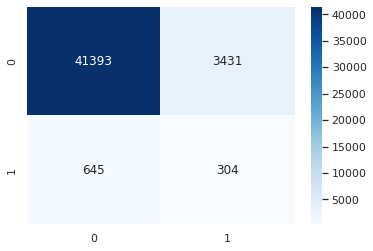

In [35]:

# import seaborn as sns
# sns.heatmap(confusion_matrix(Y_val, y_pred, labels=[0, 1]), annot=True)

labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(Y_val, y_pred, labels=[0, 1]), annot=True, fmt='', cmap='Blues')

In [26]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assume model is your trained CatBoost model
X['prob'] = model.predict_proba(X)[:, 1]

# Create a DataFrame from the predicted probabilities and true labels
# df = pd.DataFrame({'y_true': Y_val, 'y_pred_prob': y_pred_prob})

# Calculate the deciles
# df['decile'] = pd.qcut(df['y_pred_prob'].rank(method='dense'), 10, labels=False)


In [27]:
XX = pd.concat([final[['customer_number']],X], axis = 1)

In [28]:
import pandas as pd
# Assuming your dataframe is called 'df'
# Sort the dataframe based on the 'score' column
XX = XX.sort_values('prob', ascending = False)
# Calculate the deciles
num_rows = len(XX)
decile_size = num_rows // 10
decile_values = [i for i in range(1, 11) for _ in range(decile_size)]
# If the number of rows is not evenly divisible by 10, assign the remaining rows to the last decile
decile_values.extend([10] * (num_rows - len(decile_values)))
# Assign the decile values to the 'decile' column in the original dataframe
XX['decile'] = decile_values
# If you want to reset the index after sorting, you can use:
# df.reset_index(drop=True, inplace=True)

In [29]:
XX.groupby(by = 'decile').agg({'prob' : 'mean', 'customer_number': 'count'})

,prob,customer_number
decile,,
1,0.594164,12245
2,0.432352,12245
3,0.348231,12245
4,0.290236,12245
5,0.246544,12245
6,0.213345,12245
7,0.185638,12245
8,0.159911,12245
9,0.132843,12245


In [31]:
output = XX[['customer_number', 'decile']]

In [35]:
output.to_csv('nov_scoring',index = False)

In [37]:


# Initialize an empty list to store the metrics for each decile
metrics = []

for i in range(10):
    decile = df[df['decile'] == i]
    accuracy = accuracy_score(decile['y_true'], decile['y_pred_prob'] > 0.5)
    precision = precision_score(decile['y_true'], decile['y_pred_prob'] > 0.5)
    recall = recall_score(decile['y_true'], decile['y_pred_prob'] > 0.5)
    f1 = f1_score(decile['y_true'], decile['y_pred_prob'] > 0.5)
    mean_prob = decile.y_pred_prob.mean()
    count = decile.shape[0]
    true = decile.y_true.sum()
    percentage = ((true/df.y_true.sum())*100).round(2)
    
    # Append the metrics for this decile to the list
    metrics.append([i,count, accuracy, precision, recall, f1, mean_prob, true,percentage])

# Convert the list to a DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Decile','Count', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean Probability', 'Paid Cases','percentage'])

print(metrics_df)


   Decile  Count  Accuracy  Precision    Recall  F1 Score  Mean Probability  \
0       0   4578  0.993884   0.000000  0.000000  0.000000          0.087798   
1       1   4577  0.993445   0.000000  0.000000  0.000000          0.128149   
2       2   4577  0.991261   0.000000  0.000000  0.000000          0.153932   
3       3   4577  0.989294   0.000000  0.000000  0.000000          0.177401   
4       4   4578  0.988204   0.000000  0.000000  0.000000          0.202596   
5       5   4577  0.987109   0.000000  0.000000  0.000000          0.232968   
6       6   4577  0.978589   0.000000  0.000000  0.000000          0.272435   
7       7   4577  0.975093   0.000000  0.000000  0.000000          0.327499   
8       8   4577  0.968320   0.000000  0.000000  0.000000          0.411509   
9       9   4578  0.244430   0.081392  0.915663  0.149496          0.582095   

   Paid Cases  percentage  
0          28        2.95  
1          30        3.16  
2          40        4.21  
3          49     

In [38]:
metrics_df

,Decile,Count,Accuracy,Precision,Recall,F1 Score,Mean Probability,Paid Cases,percentage
0,0,4578,0.993884,0.000000,0.000000,0.000000,0.087798,28,2.95
1,1,4577,0.993445,0.000000,0.000000,0.000000,0.128149,30,3.16
2,2,4577,0.991261,0.000000,0.000000,0.000000,0.153932,40,4.21
3,3,4577,0.989294,0.000000,0.000000,0.000000,0.177401,49,5.16
4,4,4578,0.988204,0.000000,0.000000,0.000000,0.202596,54,5.69
5,5,4577,0.987109,0.000000,0.000000,0.000000,0.232968,59,6.22
6,6,4577,0.978589,0.000000,0.000000,0.000000,0.272435,98,10.33
7,7,4577,0.975093,0.000000,0.000000,0.000000,0.327499,114,12.01
8,8,4577,0.968320,0.000000,0.000000,0.000000,0.411509,145,15.28
9,9,4578,0.244430,0.081392,0.915663,0.149496,0.582095,332,34.98


In [39]:
metrics_df.percentage.sum()

99.99000000000001

In [77]:
29+14+13

56

In [40]:
X_val

,no_of_trades,total_bl,live_bl,total_cc,total_cl,total_hl,total_al,new_pl_3m,new_bl_3m,new_cc_3m,sum_pl_limit,sum_pl_limit_last_6m,sum_bl_limit,sum_bl_limit_last_6m,sum_cc_limit,TotalOverDueAmount,1_months_dpd_instances,score,Age,Income,derog,pl_vintage,bl_vintage,cl_vintage,max_pl_remaining_balance_per,max_bl_remaining_balance_per,max_credit_utilization,RBL_ultrahni,dbr,2_months_max_dpd
111369,11,0,0,0,2,0,0,0,0,0,32560.0,0.0,0.0,0.0,0.0,28442.0,1,637.0,28.0,1000.000000,1,43.0,0.0,51.0,1.190600,0.0,NaN,0,22.516885,900
85837,6,0,0,2,0,0,0,0,0,0,630000.0,280000.0,0.0,0.0,66681.0,34022.0,0,675.0,40.0,38000.000000,1,23.0,0.0,0.0,0.898029,0.0,NaN,0,50.000000,319
85045,12,0,0,3,0,0,7,0,0,0,0.0,0.0,0.0,0.0,119104.0,319339.0,1,599.0,46.0,500000.000000,1,0.0,0.0,0.0,0.000000,0.0,NaN,0,50.000000,900
37157,13,0,0,1,2,0,1,0,0,0,1760534.0,0.0,0.0,0.0,201.0,324396.0,0,636.0,57.0,42798.416667,1,217.0,0.0,24.0,0.781049,0.0,NaN,0,50.000000,425
93512,11,0,0,0,2,0,0,0,0,0,770000.0,0.0,0.0,0.0,0.0,469768.0,1,624.0,43.0,3000.000000,1,100.0,0.0,101.0,1.459244,0.0,NaN,0,37.646896,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128001,13,0,0,4,0,0,0,0,0,0,150000.0,0.0,0.0,0.0,240910.0,322384.0,0,630.0,39.0,NaN,1,65.0,0.0,0.0,0.730600,0.0,NaN,0,12.228534,900
168740,9,0,0,4,0,0,0,0,0,0,1250000.0,0.0,0.0,0.0,232382.0,1247454.0,1,616.0,38.0,111111.111111,1,90.0,0.0,0.0,1.496090,0.0,1.0,0,49.286527,900
101304,22,0,0,6,4,0,2,0,0,0,250725.0,0.0,0.0,0.0,373629.0,67861.0,0,687.0,34.0,0.000000,1,70.0,0.0,74.0,0.000000,0.0,NaN,0,5.257183,900
128002,13,0,0,1,6,0,0,0,0,0,376000.0,0.0,0.0,0.0,146612.0,525712.0,2,595.0,44.0,31250.000000,1,218.0,0.0,66.0,0.815635,0.0,NaN,0,50.000000,900


In [101]:
df

,y_true,y_pred_prob,decile
111369,0,0.245975,5
85837,0,0.529185,9
85045,0,0.183165,3
37157,0,0.714884,9
93512,0,0.164812,2
...,...,...,...
128001,0,0.343350,7
168740,0,0.130274,1
101304,0,0.376539,8
128002,0,0.078389,0


In [40]:
# Assuming `model` is your trained CatBoost model
feature_importances = model.get_feature_importance()
feature_names = model.feature_names_
check = []
# Print feature names and their corresponding importances
for name, importance in zip(feature_names, feature_importances):
    rounded_importance = round(importance, 3)
    check.append([name,rounded_importance])
    
feature_df = pd.DataFrame(check, columns = ['feature', 'importance'])

In [42]:
pd.set_option('display.max_rows', None)
feature_df.sort_values(by = ['importance'], ascending = False)

,feature,importance
28,2_months_max_dpd,13.060
15,TotalOverDueAmount,11.892
23,max_pl_remaining_balance_per,6.558
10,sum_pl_limit,6.287
14,sum_cc_limit,5.316
18,Income,4.880
20,pl_vintage,4.819
17,Age,4.657
29,last_30_days_REVISIT,4.653
0,no_of_trades,4.445


In [ ]:
top_features = feature_df['feature'].iloc[:30]
X_reduced = X[top_features]
print(top_features)

In [ ]:
# Create a new Pool with the reduced feature matrix and target vector
train_pool = Pool(X_reduced, y)

# Retrain the model on the reduced feature matrix
model.fit(train_pool)

# Create a new test feature matrix with only the top 30 features
X_reduced = X[top_features]

# Test the model on the reduced test feature matrix
predictions = model.predict(X_reduced)

# Evaluate the model


In [ ]:
pd.set_option('display.max_rows', None)

input1.corr()


In [ ]:
threshold = 0.5
cols_imp = list(feature_df.feature)
important_df = feature_df
highly_correlated_columns = X[cols_imp].corr().abs()[X[cols_imp].corr().abs()>threshold]
highly_correlated_columns = highly_correlated_columns[(highly_correlated_columns<1) & (~highly_correlated_columns.isna())]
correlated_list=[]
for index, row in highly_correlated_columns.iterrows():
    for column in highly_correlated_columns.columns:
        if pd.notnull(row[column]):
            correlated_list.append([index,column])
remove_elements = []
for i,j in correlated_list:
    if important_df.index[important_df['feature']==i].tolist()[0] < important_df.index[important_df['feature']==j].tolist()[0]:
        remove_elements.append(j)
    else:
        remove_elements.append(i)
remove_elements = list(set(remove_elements))
list(important_df[~important_df['feature'].isin(remove_elements)].head(30)['feature'])







In [ ]:
'no_of_trades','total_bl','live_bl','total_cc','total_cl','total_hl','total_al','new_pl_3m','new_bl_3m','new_cc_3m','sum_pl_limit','sum_pl_limit_last_6m','sum_bl_limit','sum_bl_limit_last_6m','sum_cc_limit'


In [43]:
import pickle

In [44]:
model.save_model('Collectionmodel.cbm')